In [37]:
import pandas as pd

nc_summary_df = pd.read_excel("~/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/dia_non-canonical_result_compare.xlsx")
nc_summary_df

,sample_id,original
0,C3N-02287_01,230
1,C3N-02287_02,256
2,C3N-02287_04,242
3,C3N-02287_05,228
4,C3N-02287_06,199
5,C3N-02287_07,215
6,C3N-02287_10,228
7,C3N-02288_01,75
8,C3N-02288_02,73
9,C3N-02288_05,54


In [38]:
sample_list = [tmp_id.split("_")[0] for tmp_id in nc_summary_df["sample_id"].tolist()]
sample_list = list(set(sample_list))
sample_list

['C3N-02290',
 'C3N-02671',
 'C3N-02287',
 'C3N-02288',
 'C3N-02289',
 'C3N-03023',
 'C3N-02672',
 'C3N-03421']

In [39]:
from alphabase.protein import fasta
fasta_list = {}
for sample_id in sample_list:
    protein_id_list = []
    protein_sequence_list = []
    f = open(f"/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/ori_fasta/{sample_id}.fasta", 'r')
    text = f.readlines()
    for line in text:
        if ">" in line:
            protein_id_list.append(line.split(">")[1].split("\n")[0])
            protein_sequence_list.append("")
        else:
            protein_sequence_list[-1] += line.replace("\n", "")
    f.close()
    protein_df = pd.DataFrame(
        {
            "protein_id":protein_id_list,
            "sequence":protein_sequence_list,
            "gene_org":"HUMAN"
        }
    )
    fasta_list[sample_id] = protein_df
fasta_list[sample_list[0]]

,protein_id,sequence,gene_org
0,sp|1-1-REF|SINE_tRNA_RTE_MamSINE1-REF SINE_tRN...,MCVARRAGENMVSMCPRTYFWFSFYSFGFILFNDLLLYPRASYLSC...,HUMAN
1,sp|1-2-REF|SINE_tRNA_RTE_MamSINE1-REF SINE_tRN...,MDEYTHMYMSLHIFTIIRNSTQSISPNDKDYPNVQRYI,HUMAN
2,sp|1-3-REF|SINE_tRNA_RTE_MamSINE1-REF SINE_tRN...,MNLRFSMTVSFFLPAKRLLCGHKRHSLSYLAVTSLCS,HUMAN
3,sp|1-4-REF|SINE_tRNA_RTE_MamSINE1-REF SINE_tRN...,MWLEHPYPLFLLECKANKCPTDGNAIVAISFLED,HUMAN
4,sp|1-5-REF|SINE_tRNA_RTE_MamSINE1-REF SINE_tRN...,MCPFLPTAISSLCAVSSKRARRHMVMTQTTTTG,HUMAN
...,...,...,...
536269,sp|128373-3-REF|DNA?_MER124-REF DNA?_MER124 OS...,MITLHRRAMRKLVNV,HUMAN
536270,sp|128373-4-REF|DNA?_MER124-REF DNA?_MER124 OS...,MHLLSTLVSYVK,HUMAN
536271,sp|128374-1-REF|DNA?_Eulor5A-REF DNA?_Eulor5A ...,MFPVRLLKSPNIPFGL,HUMAN
536272,sp|128374-2-REF|DNA?_Eulor5A-REF DNA?_Eulor5A ...,MMQFKLVLLTLGKSG,HUMAN


In [ ]:
files = []
base_path = "/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical"
for i in range(nc_summary_df.shape[0]):
    tmp_id = nc_summary_df.loc[i, "sample_id"]
    tmp_id = tmp_id.replace("_", "-")
    tmp_file = f"{base_path}/{tmp_id}/report.tsv"
    files.append(tmp_file)


In [44]:
import re

nc_summary_df["new"] = [0] * nc_summary_df.shape[0]

for i in range(len(files)):
    
    tmp_file = files[i]
    print(tmp_file)
    tmp_sample = tmp_file.split("/")[-2]
    tmp_sample_id = re.search(r"^(C3N-\d{5})", tmp_sample).groups()[0]
    tmp_pro_df = fasta_list[tmp_sample_id]

    non_canonical_df = pd.read_table(tmp_file)
    tmp_precursor_df = pd.DataFrame(
        {
            'charge': non_canonical_df["Precursor.Charge"],
            'sequence': non_canonical_df["Stripped.Sequence"],
        }
    )
    output_precursor_df = fasta.annotate_precursor_df(tmp_precursor_df, tmp_pro_df)
    output_precursor_df.drop_duplicates(subset="sequence", keep="first", inplace=True)
    nc_list = []
    te_list = []
    for k in range(output_precursor_df.shape[0]):
        protein_id = output_precursor_df.iloc[k]["proteins"]
        if "PE=NC" in protein_id:
            if "PE=PC" not in protein_id:
                nc_list.append(output_precursor_df.iloc[k]["sequence"])
        elif "PE=TE" in protein_id:
            if "PE=PC" not in protein_id:
                te_list.append(output_precursor_df.iloc[k]["sequence"])
    nc_summary_df.loc[i, "new"] = len(list(set(nc_list))) + len(list(set(te_list)))

nc_summary_df

/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-01/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 128603.96it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-02/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 126095.53it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-04/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 129722.83it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-05/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 137972.07it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-06/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 139934.07it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-07/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 136945.92it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02287-10/report.tsv


100%|██████████| 599300/599300 [00:04<00:00, 129628.49it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-01/report.tsv


100%|██████████| 539543/539543 [00:04<00:00, 132058.97it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-02/report.tsv


100%|██████████| 539543/539543 [00:04<00:00, 129406.18it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-05/report.tsv


100%|██████████| 539543/539543 [00:03<00:00, 151457.56it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-06/report.tsv


100%|██████████| 539543/539543 [00:03<00:00, 156606.30it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-08/report.tsv


100%|██████████| 539543/539543 [00:03<00:00, 135893.27it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02288-10/report.tsv


100%|██████████| 539543/539543 [00:04<00:00, 130304.31it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02289-01/report.tsv


100%|██████████| 563489/563489 [00:04<00:00, 132543.39it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02289-02/report.tsv


100%|██████████| 563489/563489 [00:04<00:00, 133704.42it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02289-03/report.tsv


100%|██████████| 563489/563489 [00:04<00:00, 135269.74it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02289-08/report.tsv


100%|██████████| 563489/563489 [00:04<00:00, 131740.95it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-03/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 139079.29it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-04/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 141884.42it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-05/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 138487.46it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-06/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 139315.83it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-08/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 141306.32it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02290-10/report.tsv


100%|██████████| 536274/536274 [00:03<00:00, 142176.97it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02671-02/report.tsv


100%|██████████| 563625/563625 [00:03<00:00, 141582.02it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02671-03/report.tsv


100%|██████████| 563625/563625 [00:04<00:00, 136088.32it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02671-04/report.tsv


100%|██████████| 563625/563625 [00:04<00:00, 133598.99it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02671-05/report.tsv


100%|██████████| 563625/563625 [00:04<00:00, 136551.13it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02672-03/report.tsv


100%|██████████| 521770/521770 [00:04<00:00, 122049.75it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02672-04/report.tsv


100%|██████████| 521770/521770 [00:04<00:00, 123390.81it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02672-06/report.tsv


100%|██████████| 521770/521770 [00:04<00:00, 123575.41it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-02672-07/report.tsv


100%|██████████| 521770/521770 [00:04<00:00, 124282.65it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-01/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 136916.46it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-03/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 129974.18it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-04/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 141157.32it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-05/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 134604.26it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-06/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 141677.05it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-07/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 136881.16it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03023-09-10/report.tsv


100%|██████████| 576577/576577 [00:04<00:00, 140719.15it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-02/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 130892.46it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-03/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 131543.70it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-05/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 133499.42it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-06/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 137697.44it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-07/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 132682.54it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-08/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 127295.71it/s]


/Users/chengjintao/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/C3N-03421-10/report.tsv


100%|██████████| 582820/582820 [00:04<00:00, 136270.90it/s]


,sample_id,original,new
0,C3N-02287_01,230,447
1,C3N-02287_02,256,514
2,C3N-02287_04,242,529
3,C3N-02287_05,228,351
4,C3N-02287_06,199,344
5,C3N-02287_07,215,357
6,C3N-02287_10,228,432
7,C3N-02288_01,75,196
8,C3N-02288_02,73,233
9,C3N-02288_05,54,65


In [45]:
nc_summary_df.to_excel("~/Desktop/hla/test_cjt/data/PXD034772/DIA-non-canonical/dia_non-canonical_result_compare.xlsx", index=False)

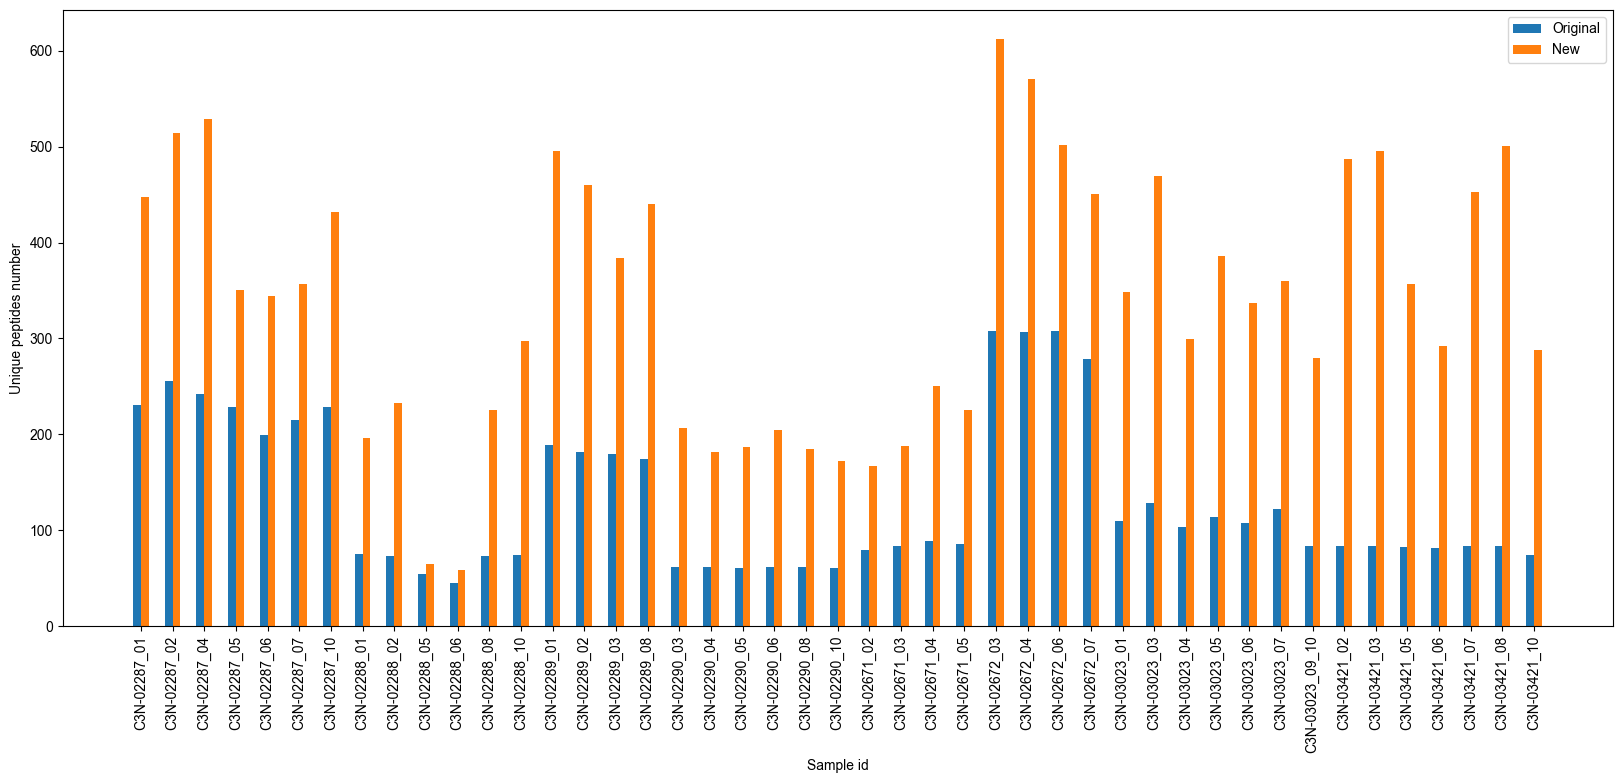

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(20, 8))
# 设置柱状图的位置和宽度
bar_width = 1
index = 4*np.arange(nc_summary_df.shape[0])

# 绘制柱状图
plt.bar(index, nc_summary_df["original"], bar_width, label="Original")
plt.bar(index + bar_width, nc_summary_df["new"], bar_width, label="New")

# 添加标题和轴标签
plt.xlabel('Sample id')
plt.ylabel('Unique peptides number')

# 显示图例
plt.legend()

# 在X轴上设置类别标签
plt.xticks(index + bar_width / 2, nc_summary_df["sample_id"], rotation=90)

# 显示图表
# plt.tight_layout()
plt.savefig('/Users/chengjintao/Desktop/hla/test_cjt/figures/fig2_dia_non-canonical.svg', format='svg', dpi=300, bbox_inches='tight')